### Importing Packages and Data

In [95]:
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import pandas as pd
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, f1_score

In [3]:
train_data_dir = '../Mod 6 Project/gtsrb-german-traffic-sign/Train'
test_data_dir = '../Mod 6 Project/gtsrb-german-traffic-sign/Test 2'

In [57]:
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), batch_size=39209)

test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), batch_size=12630)

Found 39209 images belonging to 43 classes.
Found 12630 images belonging to 1 classes.


In [58]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

In [39]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

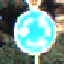

In [41]:
#for our training set, the images match with the labels
array_to_img(train_images[0])

In [42]:
#testing labels are not useable and must be remade
test_labels[0]

array([1.], dtype=float32)

### Remaking the Testing Labels

In [60]:
#Test CSV has the proper labels for the test signs
df = pd.read_csv('gtsrb-german-traffic-sign/test.csv')

In [61]:
#isolating the column and converting to string for using get dummies
test_df = df['ClassId'].astype('str')

In [62]:
#the test_df value corresponds to the correct image
test_df[0]

'16'

In [63]:
#turning the test_df into dummy variables
test_labels_df = test_df.str.get_dummies()e

In [64]:
#the dummies are true to the values but out of order
test_labels_df.iloc[0:10]

,0,1,10,11,12,13,14,15,16,17,...,39,4,40,41,42,5,6,7,8,9
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
test_labels_list = test_labels_df.values.tolist()

In [66]:
test_labels_list

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

In [67]:
#converting the list of lists into a list of arrays to match train format
test_labels = []

for array in test_labels_list:
    test_labels.append(np.array(array))

In [51]:
test_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Remaking the Training Labels

In [106]:
#revising the training labels so that they are consistent with the test labels
df = pd.read_csv('gtsrb-german-traffic-sign/train.csv')
train_df = df['ClassId'].astype('str')
train_labels_df = train_df.str.get_dummies()
train_labels_list = train_labels_df.values.tolist()
train_labels = []
for array in train_labels_list:
    train_labels.append(np.array(array))


In [108]:
test_labels_final = np.array(test_labels).reshape(43, -1).T

### Reshaping Data

In [109]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(39209, 64, 64, 3)
(39209, 43)
(12630, 64, 64, 3)
(12630, 43)


In [70]:
train_img_unrow = train_images.reshape(39209, -1).T
test_img_unrow = test_images.reshape(12630, -1).T

In [71]:
train_img_final = train_img_unrow / 255
test_img_final = test_img_unrow / 255

In [112]:
print(np.shape(train_img_final))
print(np.shape(train_labels))
print(np.shape(test_img_final))
print(np.shape(test_labels))

(12288, 39209)
(39209, 43)
(12288, 12630)
(12630, 43)


In [111]:
train_labels_final = np.array(train_labels).reshape(43, -1).T

In [87]:
np.shape(test_labels_final)

(12630, 43)

### Creating and Running the Neural Net

In [114]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))

In [115]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)             

In [117]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [119]:
history = model.fit(train_images, train_labels_final, epochs=10, batch_size=64)

Epoch 1/10
39209/39209 [==============================] - 162s 4ms/step - loss: 3.7615 - accuracy: 0.0138
Epoch 2/10
39209/39209 [==============================] - 164s 4ms/step - loss: 3.7616 - accuracy: 0.0557
Epoch 3/10
39209/39209 [==============================] - 163s 4ms/step - loss: 3.7615 - accuracy: 0.0096
Epoch 4/10
39209/39209 [==============================] - 162s 4ms/step - loss: 3.7616 - accuracy: 0.0090
Epoch 5/10
39209/39209 [==============================] - 164s 4ms/step - loss: 3.7616 - accuracy: 0.0066
Epoch 6/10
39209/39209 [==============================] - 162s 4ms/step - loss: 3.7615 - accuracy: 0.0317
Epoch 7/10
39209/39209 [==============================] - 162s 4ms/step - loss: 3.7615 - accuracy: 0.0186
Epoch 8/10
39209/39209 [==============================] - 161s 4ms/step - loss: 3.7616 - accuracy: 0.0133
Epoch 9/10
39209/39209 [==============================] - 162s 4ms/step - loss: 3.7616 - accuracy: 0.0176
Epoch 10/10
39209/39209 [=====================

In [88]:
test_loss, test_acc = model.evaluate(test_images, test_labels_final)

12630/12630 [==============================] - 16s 1ms/step


In [90]:
#first model accuracy, pre changing the training labels
score = model.evaluate(test_images, test_labels_final, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 86.36748447856164
Test accuracy: 0.01852731592953205


In [92]:
predictions_transfer = model.predict(test_images)
predictions_transfer = np.around(predictions_transfer)

In [103]:
f1_score(test_labels_final, predictions_transfer, average='micro')
#This value is so low that its not an issue of the model but rather of the label
#accuracy pre-changing the training labels

0.02511823854377807

### Second Iteration, changed training labels to match test label format

In [121]:
test_loss, test_acc = model.evaluate(test_images, test_labels_final)

12630/12630 [==============================] - 16s 1ms/step


In [122]:
score = model.evaluate(test_images, test_labels_final, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.7612090472087725
Test accuracy: 0.015676960349082947


In [123]:
predictions_transfer = model.predict(test_images)
predictions_transfer = np.around(predictions_transfer)
f1_score(test_labels_final, predictions_transfer, average='micro')

/Users/OwenPeng/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

### The accuracy is  too low, it has to be a labeling issue

In [124]:
test_labels_final[0]
#there is a one at 27 which indicates that this is a sign 32 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [141]:
test_labels_df

,0,1,10,11,12,13,14,15,16,17,...,39,4,40,41,42,5,6,7,8,9
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12625,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [140]:
test_labels_df.columns

Index(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40',
       '41', '42', '5', '6', '7', '8', '9'],
      dtype='object')

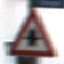

In [139]:
array_to_img(test_images[0])
#this image corresponds to sign 11 which should be coded as a 4

In [127]:
train_labels_final[1]
#there is a one at 25 and 35, not the format we expected

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

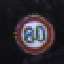

In [143]:
array_to_img(train_images[1])
#currently this photo corresponds to the above label, but maybe not consistent with the proper labeling